In [6]:
import os
import torch
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


In [3]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')

In [7]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


In [8]:
airplane_files=airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3975.png', '1804.png', '4968.png', '1810.png', '3961.png']


In [14]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [12]:
dataset= ImageFolder(data_dir+"/train",transform=ToTensor())

torch.Size([3, 32, 32])


tensor([[[0.9020, 0.8941, 0.8902,  ..., 0.8667, 0.8667, 0.8667],
         [0.8980, 0.8902, 0.8902,  ..., 0.8667, 0.8588, 0.8588],
         [0.8902, 0.8902, 0.8863,  ..., 0.8706, 0.8706, 0.8706],
         ...,
         [0.5333, 0.5137, 0.4863,  ..., 0.3725, 0.3725, 0.3882],
         [0.5137, 0.4980, 0.4706,  ..., 0.3686, 0.3647, 0.3686],
         [0.5176, 0.4980, 0.4745,  ..., 0.3647, 0.3686, 0.3647]],

        [[0.9020, 0.8941, 0.8902,  ..., 0.8667, 0.8667, 0.8667],
         [0.8980, 0.8902, 0.8902,  ..., 0.8667, 0.8588, 0.8588],
         [0.8902, 0.8902, 0.8863,  ..., 0.8706, 0.8706, 0.8706],
         ...,
         [0.5333, 0.5137, 0.4863,  ..., 0.3725, 0.3725, 0.3882],
         [0.5137, 0.4980, 0.4706,  ..., 0.3686, 0.3647, 0.3686],
         [0.5176, 0.4980, 0.4745,  ..., 0.3647, 0.3686, 0.3647]],

        [[0.9020, 0.8941, 0.8902,  ..., 0.8667, 0.8667, 0.8667],
         [0.8980, 0.8902, 0.8902,  ..., 0.8667, 0.8588, 0.8588],
         [0.8902, 0.8902, 0.8863,  ..., 0.8706, 0.8706, 0.

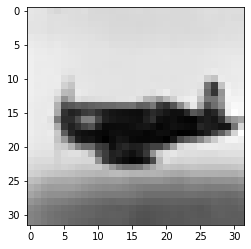

In [21]:
img,label=dataset[6]
# img.permute(1,2,0)
print(img.shape)
plt.imshow(img.permute(1,2,0))
img


In [22]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

torch.Size([3, 32, 32])


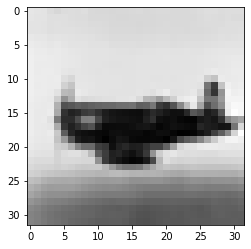

In [23]:
img,label=dataset[6]
# img.permute(1,2,0)
print(img.shape)
plt.imshow(img.permute(1,2,0))

In [24]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

In [25]:
random_seed=42
torch.manual_seed(random_seed)

In [28]:
val_size=5000
train_size=len(dataset)-val_size

train_ds,val_ds=random_split(dataset,[train_size,val_size])


In [29]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [30]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [39]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

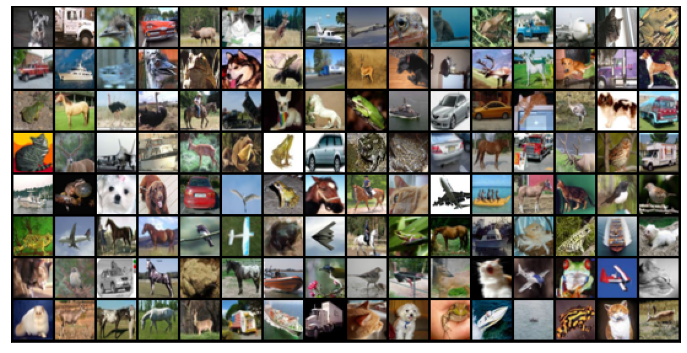

In [42]:
show_batch(train_dl)

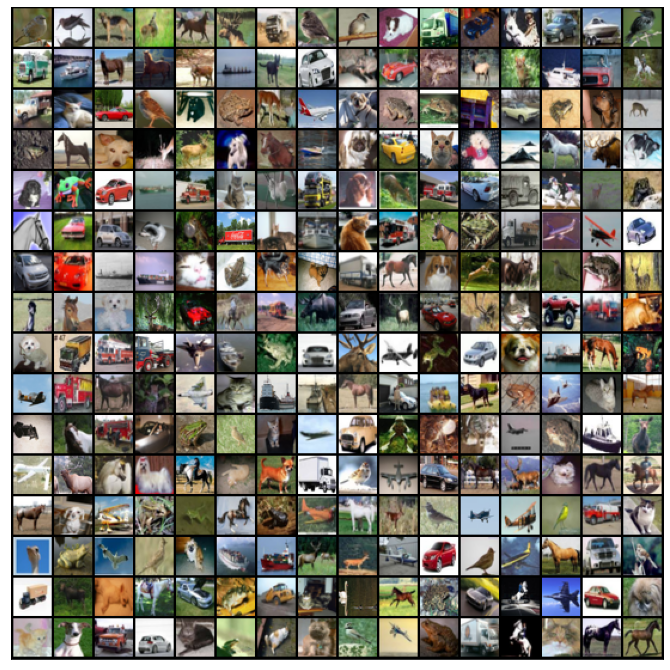

In [41]:
show_batch(val_dl)

In [45]:
def apply_kernel(image,kernel):
    ri,ci=image.shape #image dimensions
    rk,ck=kernel.shape #kernel dimensions
    ro,co=ri-rk+1, ci-ck+1 #output dimensions
    output=torch.zeros([ro,co])
    for i in range(ro):
        for j in range(co):
            output[i,j]=torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [47]:
trail_image=torch.Tensor(
    [
    [1,2,3,4,5],
    [1,0,4,3,5],
    [1,2,5,3,0],
    [1,4,2,5,5],
    [4,5,4,6,7]
    ]
)
trail_kernel=torch.Tensor(
    [
    [1,0,1],
    [0,1,0],
    [0,0,1]]
)

apply_kernel(trail_image,trail_kernel)

tensor([[ 9., 13., 11.],
        [ 9., 13., 17.],
        [14., 13., 17.]])

In [49]:
import torch.nn as nn
import torch.nn.functional as F

In [50]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [51]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


In [52]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [55]:
class ImageClassifier(nn.Module):
    def training_step(self,batch):
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        return loss
    
 
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [56]:
class CIFAR10_CNN_MODEL(ImageClassifier):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),̧d
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, xb):
        return self.network(xb)


In [57]:
model=CIFAR10_CNN_MODEL()
model

CIFAR10_CNN_MODEL(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fe

In [59]:
for images,labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])


In [60]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cpu')

In [69]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [71]:
model = CIFAR10_CNN_MODEL()


In [72]:
evaluate(model, val_dl)


{'val_loss': 2.3026936054229736, 'val_acc': 0.09877067804336548}

In [73]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 0.001

In [75]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], val_loss: 1.3949, val_acc: 0.4817
Epoch [1], val_loss: 1.1297, val_acc: 0.5964
Epoch [2], val_loss: 0.9513, val_acc: 0.6677
Epoch [3], val_loss: 0.8086, val_acc: 0.7165
Epoch [4], val_loss: 0.7737, val_acc: 0.7322
Epoch [5], val_loss: 0.7051, val_acc: 0.7559
Epoch [6], val_loss: 0.7589, val_acc: 0.7378
Epoch [7], val_loss: 0.7589, val_acc: 0.7536
Epoch [8], val_loss: 0.7473, val_acc: 0.7660
Epoch [9], val_loss: 0.8135, val_acc: 0.7596


In [76]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

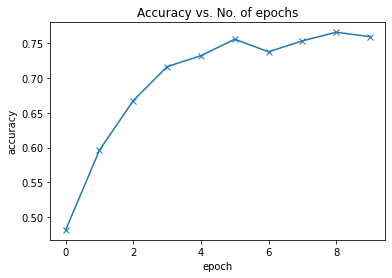

In [77]:
plot_accuracies(history)

In [78]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

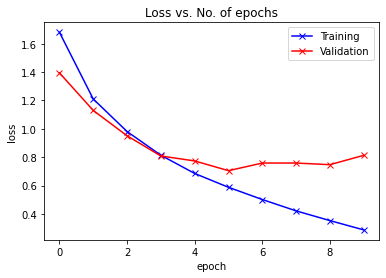

In [79]:
plot_losses(history)

In [80]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [81]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


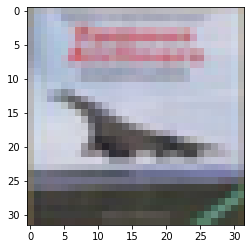

In [82]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))


Label: automobile , Predicted: truck


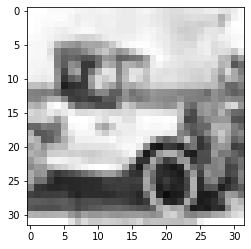

In [83]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))